In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score


In [3]:
df = pd.read_csv("nifty_500.csv")
df.columns = df.columns.str.strip()
df.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

In [7]:
# Identify numerical columns
num_cols = ["Change", "Percentage Change", "Last Traded Price", "Open", "High", "Low", "Previous Close", "Volume"]
num_cols = [col for col in num_cols if col in df.columns]
for col in num_cols:
    df[col] = df[col].astype(str).str.replace(",", "", regex=True)  # Remove commas
    df[col] = df[col].replace(["-", " "], np.nan)  # Replace dashes and spaces with NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)  # Using mean instead of median
df.head()


,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [8]:
drop_cols = ["Company Name", "Symbol"]
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)


In [9]:
df.head()

,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [12]:
categorical_cols = ["Industry", "Series"]
categorical_cols = [col for col in categorical_cols if col in df.columns]

if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols)


In [18]:
feature_columns = df.drop(columns=["Last Traded Price", "Percentage Change"], errors='ignore').columns

for col in feature_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace remaining NaNs with column mean
df[feature_columns] = df[feature_columns].fillna(df[feature_columns].mean())


In [24]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[feature_columns])
df_scaled = pd.DataFrame(scaled_features, columns=feature_columns)

df_scaled["Last Traded Price"] = df["Last Traded Price"].astype(float).values
df_scaled["Percentage Change"] = df["Percentage Change"].astype(float).values
df.head()

,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,...,Industry_Media Entertainment & Publication,Industry_Metals & Mining,Industry_Oil Gas & Consumable Fuels,Industry_Power,Industry_Realty,Industry_Services,Industry_Telecommunication,Industry_Textiles,Series_BE,Series_EQ
0,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,...,False,False,False,False,False,False,False,False,False,True
1,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,...,False,False,False,False,False,False,False,False,False,True
2,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,...,False,False,False,False,False,False,False,False,False,True
3,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,...,False,False,False,False,False,False,False,False,False,True
4,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,...,False,False,False,False,False,False,False,False,False,True


In [50]:
X_reg = df_scaled.drop(columns=["Last Traded Price", "Percentage Change"])
y_reg = df_scaled["Last Traded Price"]

# Train-test split with different ratio
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)

# Use Polynomial Features to add interactions
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_reg)
X_test_poly = poly.transform(X_test_reg)

model_reg = LinearRegression()
model_reg.fit(X_train_poly, y_train_reg)
y_pred_reg = model_reg.predict(X_test_poly)

print("Regression Metrics:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))


Regression Metrics:
MAE: 12.587475138326404
RMSE: 66.29163654814865


In [54]:
model_reg.score(X_test_poly,y_test_reg)

0.9994862431292235

In [69]:
df_scaled["Target"] = (df_scaled["Percentage Change"] > 0).astype(int)

X_cls = df_scaled.drop(columns=["Last Traded Price", "Percentage Change", "Target"])
y_cls = df_scaled["Target"]

# Different train-test split ratio
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# Using RandomForestClassifier instead of SVC
model_cls = RandomForestClassifier(n_estimators=100, random_state=42)
model_cls.fit(X_train_cls, y_train_cls)
y_pred_cls = model_cls.predict(X_test_cls)

print("Classification Metrics:")
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("Precision:", precision_score(y_test_cls, y_pred_cls))
print("Recall:", recall_score(y_test_cls, y_pred_cls))
print("F1-score:", f1_score(y_test_cls, y_pred_cls))


Classification Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


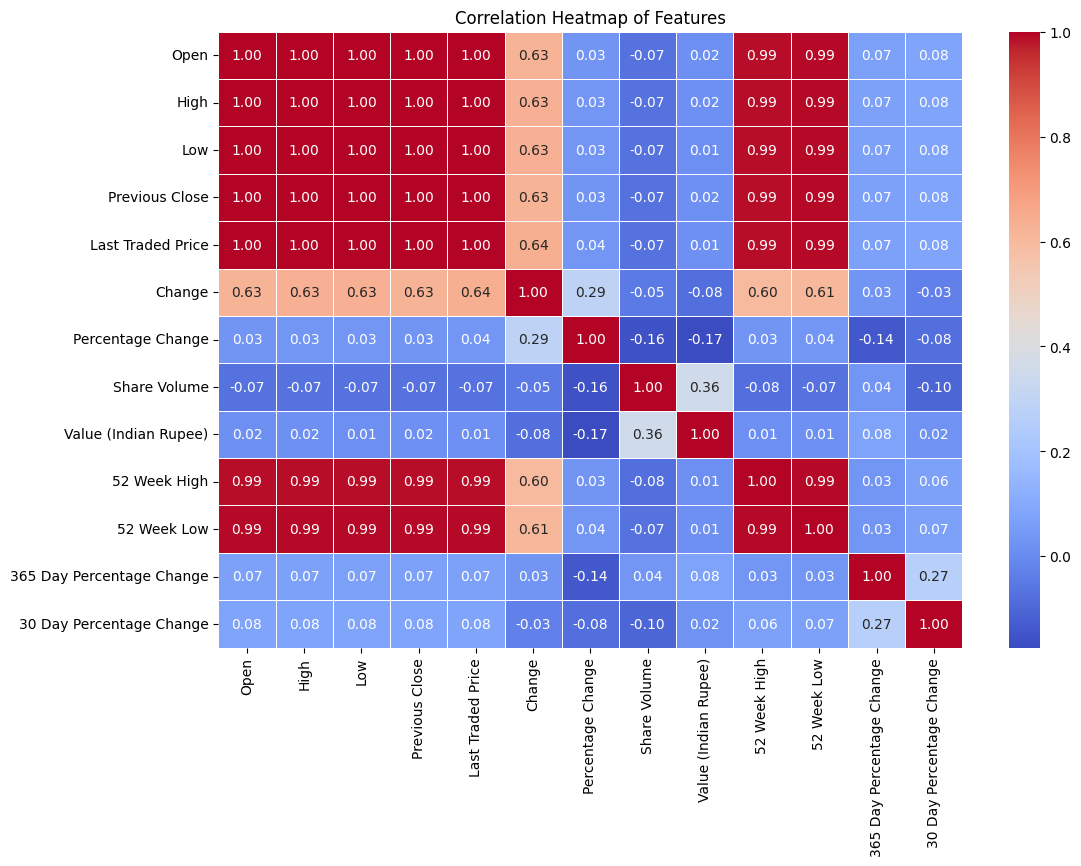

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()